In [13]:
# Import Your Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms
import cv2

## Part 1

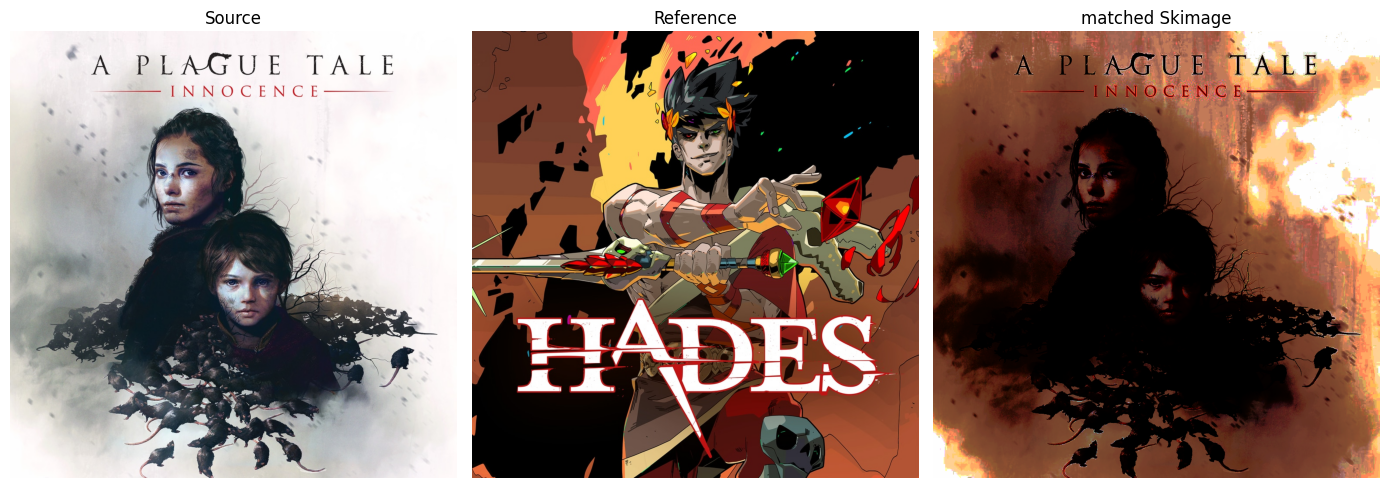

In [14]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched_skimage =  match_histograms(source, reference, channel_axis=-1)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched_skimage)
ax3.set_title('matched Skimage')

plt.tight_layout()
plt.show()

## Part 2

In [15]:
import numpy as np

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def hist_equ(image):

    unique, counts = np.unique(image, return_counts=True)
    pxl_count = dict(zip(unique, counts))

    key = [*pxl_count]
    key.sort() # we can remove this line
    list_sum = [] # sigma (𝑛𝑗 / 𝑛)
    counter = 0

    new_pxl = {}
    
    for item in key:
        counter += pxl_count[item]
        new_pxl.update({item:counter})


    return new_pxl

In [16]:
def hist_matching(src_image, ref_image):
  '''
  inputs:
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output:
    output_image (ndarray): transformed image 
  '''
  
  ### YOUR CODE ###
  # START


  pxl_count_src = hist_equ(src_image)
  val_src = [*pxl_count_src.values()]

  pxl_count_ref = hist_equ(ref_image)
  val_ref = [*pxl_count_ref.values()]
  key_ref = [*pxl_count_ref]
  
  change_pxl = {}
  for item in [*pxl_count_src]:
    near = find_nearest(val_ref, value=pxl_count_src[item])
    position = val_ref.index(near)
    change_pxl.update({item:key_ref[position]})


  size = src_image.shape[0:2]

  for row in range(size[0]):
    for col in range(size[1]):
        src_image[row][col] = change_pxl[src_image[row][col]]

  # END
  output_image = src_image
  return output_image

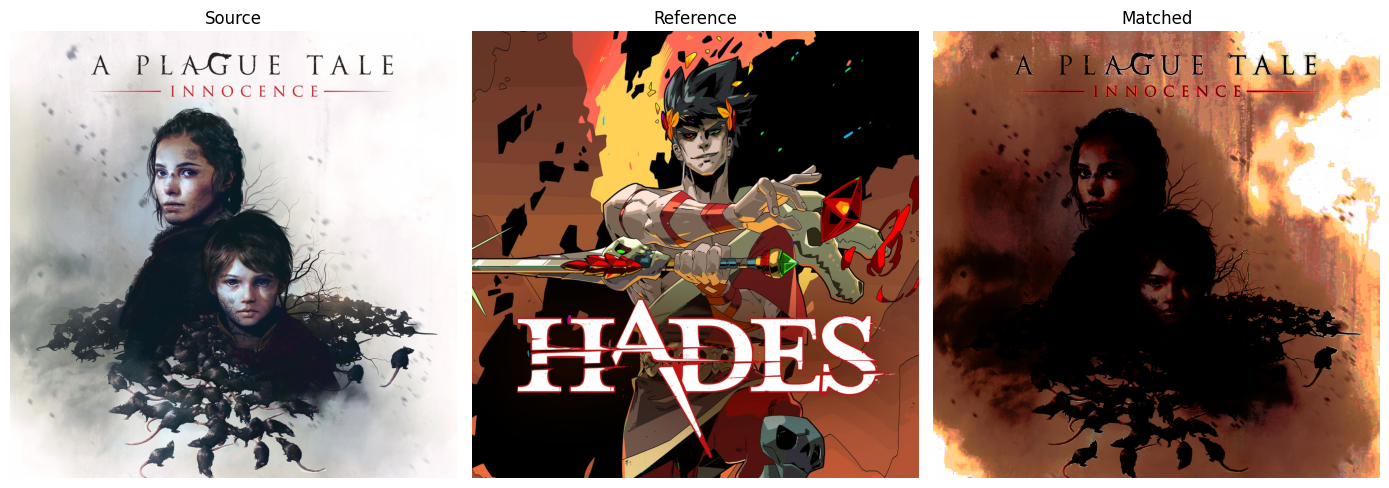

In [17]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
source_cv = cv2.imread('A Plague Tale.jpg')
reference_cv = cv2.imread('Hades.jpg')

b_src,g_src,r_src = cv2.split(source_cv)
b_ref,g_ref,r_ref = cv2.split(reference_cv)

b = hist_matching(b_src,b_ref)
g = hist_matching(g_src,g_ref)
r = hist_matching(r_src,r_ref)
matched = cv2.merge((r,g,b))


# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

{0: 684580, 1: 363996}
{0: 661531, 1: 387045}
{0: 693811, 1: 354765}


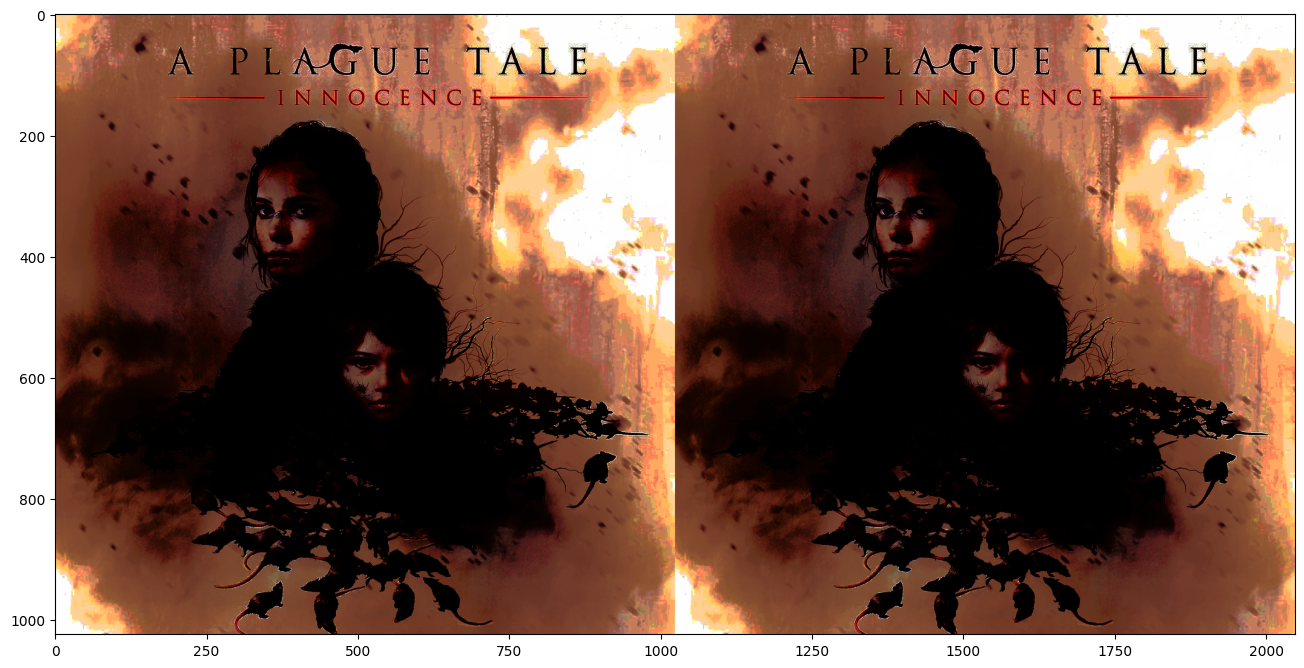

In [18]:

b_matched,g_matched,r_matched = cv2.split(matched)
b_matched_skimage,g_matched_skimage,r_matched_skimage = cv2.split(matched_skimage)

b = b_matched - b_matched_skimage
g = g_matched - g_matched_skimage
r = r_matched - r_matched_skimage

for item in [b,g,r]:
    unique, counts = np.unique(item, return_counts=True)
    pxl_count = dict(zip(unique, counts))
    print(pxl_count)

diff = np.hstack((matched, matched_skimage))

plt.figure(figsize=(16, 16))
plt.imshow(diff, cmap='gray')

## Part 3

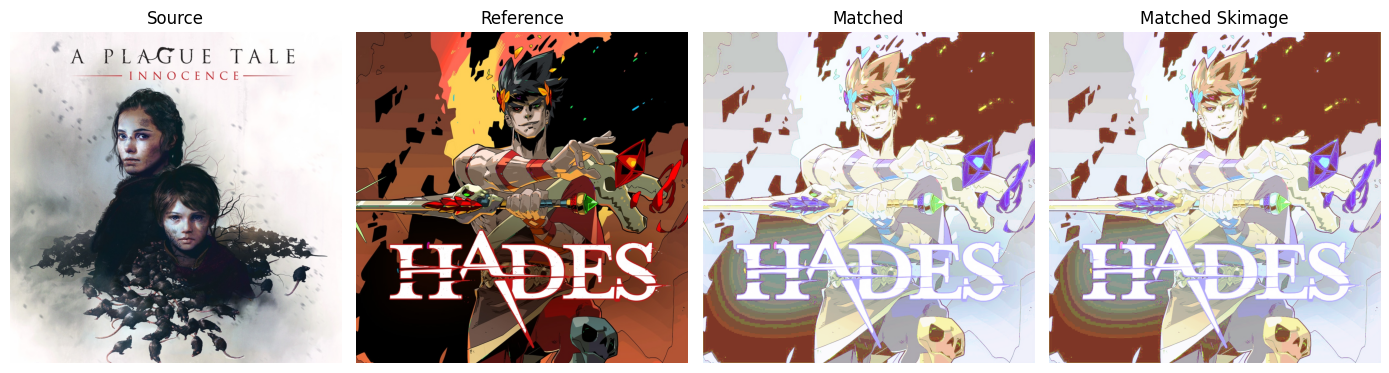

In [19]:
reference_cv= cv2.imread('A Plague Tale.jpg')
source_cv = cv2.imread('Hades.jpg')

b_src,g_src,r_src = cv2.split(source_cv)
b_ref,g_ref,r_ref = cv2.split(reference_cv)

b = hist_matching(b_src,b_ref)
g = hist_matching(g_src,g_ref)
r = hist_matching(r_src,r_ref)
matched = cv2.merge((b,g,r))

matched_skimage =  match_histograms(source_cv, reference_cv, channel_axis=-1)


# END

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3, ax4):
    aa.set_axis_off()


ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')
ax4.imshow(matched_skimage)
ax4.set_title('Matched Skimage')

plt.tight_layout()
plt.show()